Author: Alan Mössinger
Linkedin profile: www.linkedin.com/in/alan-mössinger

## Objectives

Amazing libraries to automate the Exploratory Data Analysis (EDA) and save time
by gaining insight into data and create a quick report!
Ending with Machine Learning Regression with interpretaion of the results and fully explanation about all not so trivial metrics.
Enjoy!


### Importing Needed packages


In [1]:
#!pip install dtale
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import warnings
import dtale
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings('ignore')
%matplotlib inline


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data


In [2]:
#gettting the data direct from url and then loading
#url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

### Data Exploration
Let's first have a descriptive exploration on our data.


In [3]:
# 1 summarize the data
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [4]:
df.tail()

MODELYEAR   MAKE     MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
1062       2014  VOLVO  XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO  XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO  XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO  XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Let's select some features to explore more.


In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267

In [8]:
#check for duplications
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [9]:
#missing values calculations
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [10]:
#missing values calculations in percentage
(df.isnull().sum()/len(df)*100)

MODELYEAR                   0.0
MAKE                        0.0
MODEL                       0.0
VEHICLECLASS                0.0
ENGINESIZE                  0.0
CYLINDERS                   0.0
TRANSMISSION                0.0
FUELTYPE                    0.0
FUELCONSUMPTION_CITY        0.0
FUELCONSUMPTION_HWY         0.0
FUELCONSUMPTION_COMB        0.0
FUELCONSUMPTION_COMB_MPG    0.0
CO2EMISSIONS                0.0
dtype: float64

In [11]:
#Analyse Data reduction, some columns or variables can be dropped 
#to not add value to our analysis
#df = df.drop([.....], axis=1)

In [12]:
print(df.MAKE.unique())
print(df.MAKE.nunique())

['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
39


In [13]:
#Statistic Summary - only numeric data
df.describe().T

count         mean        std     min      25%  \
MODELYEAR                 1067.0  2014.000000   0.000000  2014.0  2014.00   
ENGINESIZE                1067.0     3.346298   1.415895     1.0     2.00   
CYLINDERS                 1067.0     5.794752   1.797447     3.0     4.00   
FUELCONSUMPTION_CITY      1067.0    13.296532   4.101253     4.6    10.25   
FUELCONSUMPTION_HWY       1067.0     9.474602   2.794510     4.9     7.50   
FUELCONSUMPTION_COMB      1067.0    11.580881   3.485595     4.7     9.00   
FUELCONSUMPTION_COMB_MPG  1067.0    26.441425   7.468702    11.0    21.00   
CO2EMISSIONS              1067.0   256.228679  63.372304   108.0   207.00   

                             50%      75%     max  
MODELYEAR                 2014.0  2014.00  2014.0  
ENGINESIZE                   3.4     4.30     8.4  
CYLINDERS                    6.0     8.00    12.0  
FUELCONSUMPTION_CITY        12.6    15.55    30.2  
FUELCONSUMPTION_HWY          8.8    10.85    20.5  
FUELCONSUMPTION_COMB        10.9    13.35    25.8  
FUELCONSUMPTION_COMB_MPG    26.0    31.00    60.0  
CO2EMISSIONS               251.0   294.00   488.0

In [14]:
#Sumarry of all data, include object and category, etc.
df.describe(include="all").T

count unique       top freq        mean        std  \
MODELYEAR                 1067.0    NaN       NaN  NaN      2014.0        0.0   
MAKE                        1067     39      FORD   90         NaN        NaN   
MODEL                       1067    663  F150 FFV    8         NaN        NaN   
VEHICLECLASS                1067     16  MID-SIZE  178         NaN        NaN   
ENGINESIZE                1067.0    NaN       NaN  NaN    3.346298   1.415895   
CYLINDERS                 1067.0    NaN       NaN  NaN    5.794752   1.797447   
TRANSMISSION                1067     22        A6  222         NaN        NaN   
FUELTYPE                    1067      4         X  514         NaN        NaN   
FUELCONSUMPTION_CITY      1067.0    NaN       NaN  NaN   13.296532   4.101253   
FUELCONSUMPTION_HWY       1067.0    NaN       NaN  NaN    9.474602    2.79451   
FUELCONSUMPTION_COMB      1067.0    NaN       NaN  NaN   11.580881   3.485595   
FUELCONSUMPTION_COMB_MPG  1067.0    NaN       NaN  NaN   26.441425   7.468702   
CO2EMISSIONS              1067.0    NaN       NaN  NaN  256.228679  63.372304   

                             min     25%     50%     75%     max  
MODELYEAR                 2014.0  2014.0  2014.0  2014.0  2014.0  
MAKE                         NaN     NaN     NaN     NaN     NaN  
MODEL                        NaN     NaN     NaN     NaN     NaN  
VEHICLECLASS                 NaN     NaN     NaN     NaN     NaN  
ENGINESIZE                   1.0     2.0     3.4     4.3     8.4  
CYLINDERS                    3.0     4.0     6.0     8.0    12.0  
TRANSMISSION                 NaN     NaN     NaN     NaN     NaN  
FUELTYPE                     NaN     NaN     NaN     NaN     NaN  
FUELCONSUMPTION_CITY         4.6   10.25    12.6   15.55    30.2  
FUELCONSUMPTION_HWY          4.9     7.5     8.8   10.85    20.5  
FUELCONSUMPTION_COMB         4.7     9.0    10.9   13.35    25.8  
FUELCONSUMPTION_COMB_MPG    11.0    21.0    26.0    31.0    60.0  
CO2EMISSIONS               108.0   207.0   251.0   294.0   488.0

In [15]:
print(df.dtypes)

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object


In [16]:
#Separate categorical variables and numerical variables

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print('Categorical Variables:', cat_cols)
print('Numerical Variables:', num_cols)

Categorical Variables: Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')
Numerical Variables: ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


In [17]:
#Convert object to category

df[cat_cols] = df[cat_cols].astype('category')
print(df.dtypes)

MODELYEAR                      int64
MAKE                        category
MODEL                       category
VEHICLECLASS                category
ENGINESIZE                   float64
CYLINDERS                      int64
TRANSMISSION                category
FUELTYPE                    category
FUELCONSUMPTION_CITY         float64
FUELCONSUMPTION_HWY          float64
FUELCONSUMPTION_COMB         float64
FUELCONSUMPTION_COMB_MPG       int64
CO2EMISSIONS                   int64
dtype: object


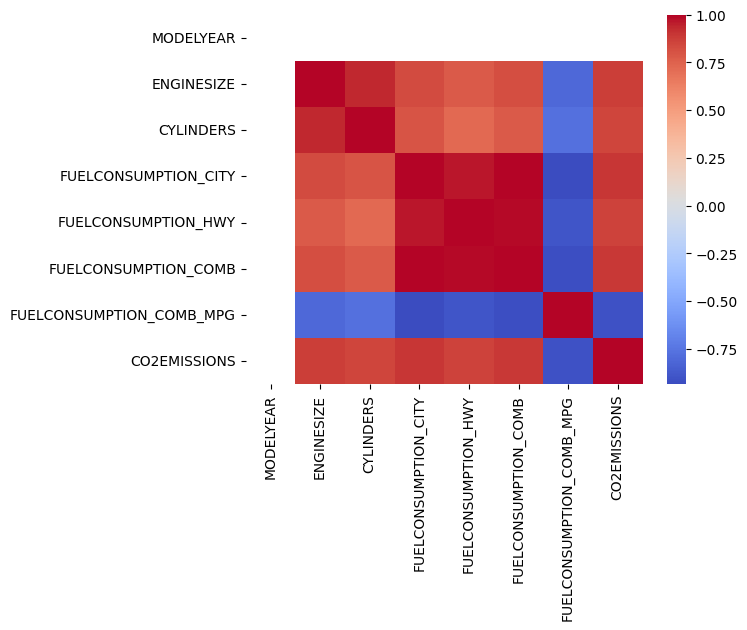

In [18]:
#correlation plot
corr = df[num_cols].corr()
sns.heatmap(corr, annot =True, cmap='coolwarm')
plt.show()

MODELYEAR
Skew: 0.0
ENGINESIZE
Skew: 0.57
CYLINDERS
Skew: 0.8
FUELCONSUMPTION_CITY
Skew: 0.9
FUELCONSUMPTION_HWY
Skew: 1.26
FUELCONSUMPTION_COMB
Skew: 1.03
FUELCONSUMPTION_COMB_MPG
Skew: 0.59
CO2EMISSIONS
Skew: 0.52


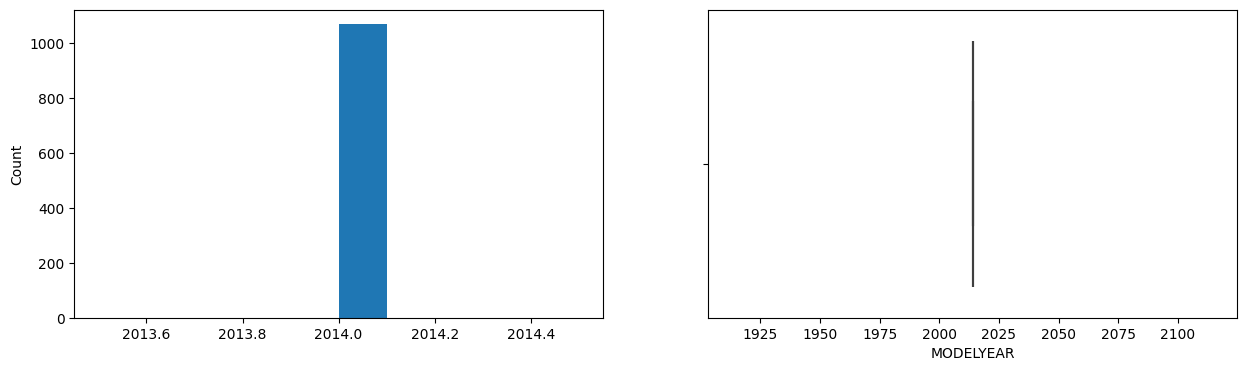

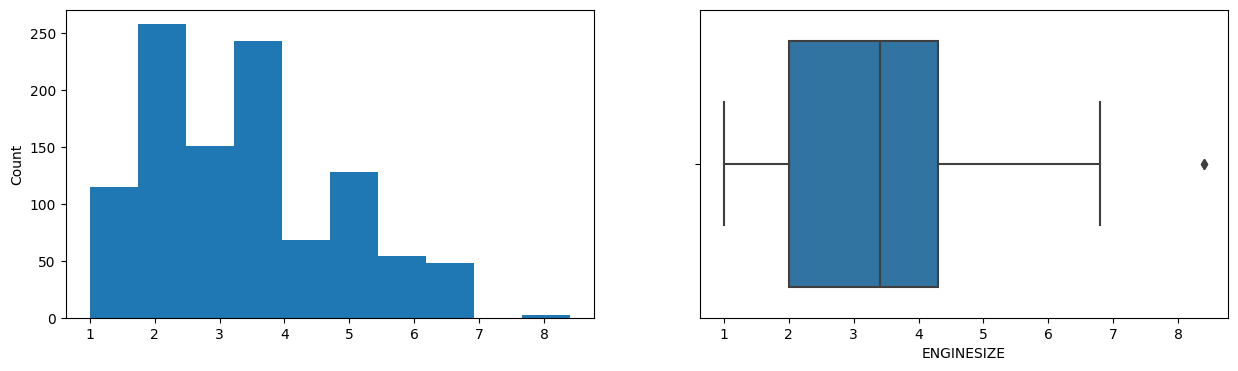

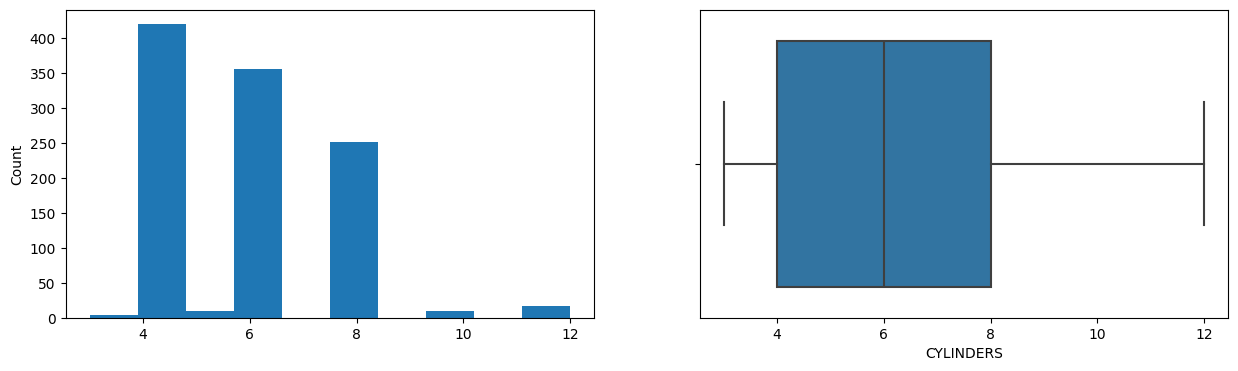

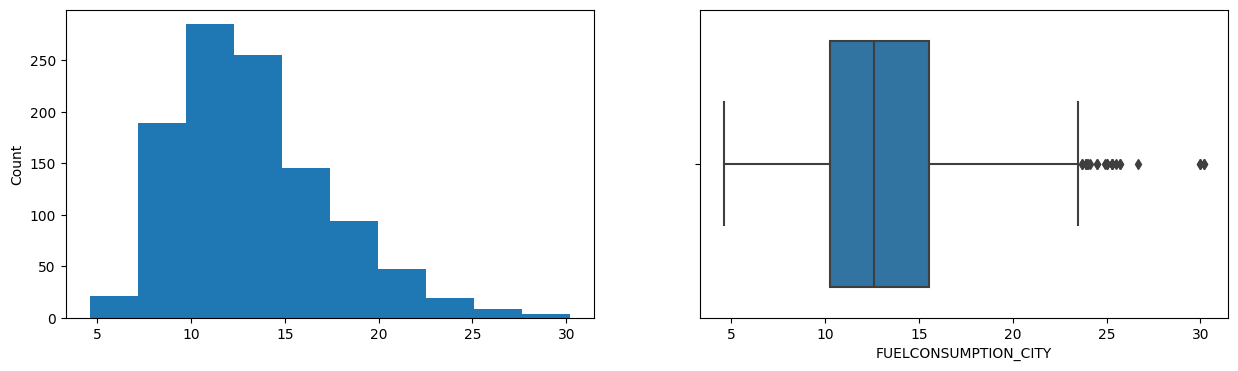

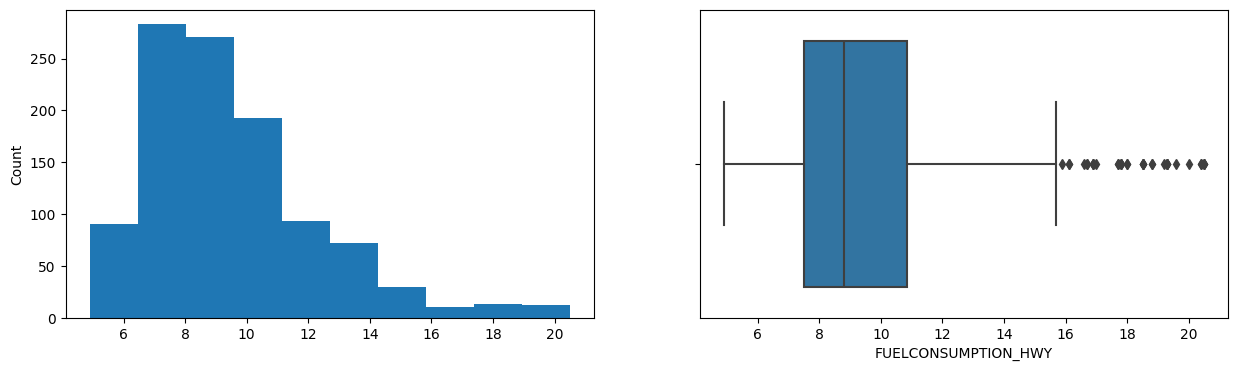

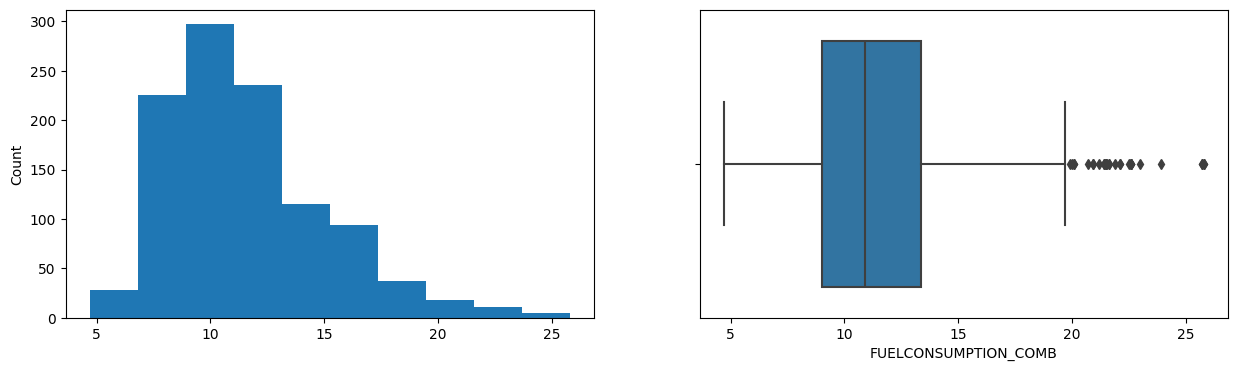

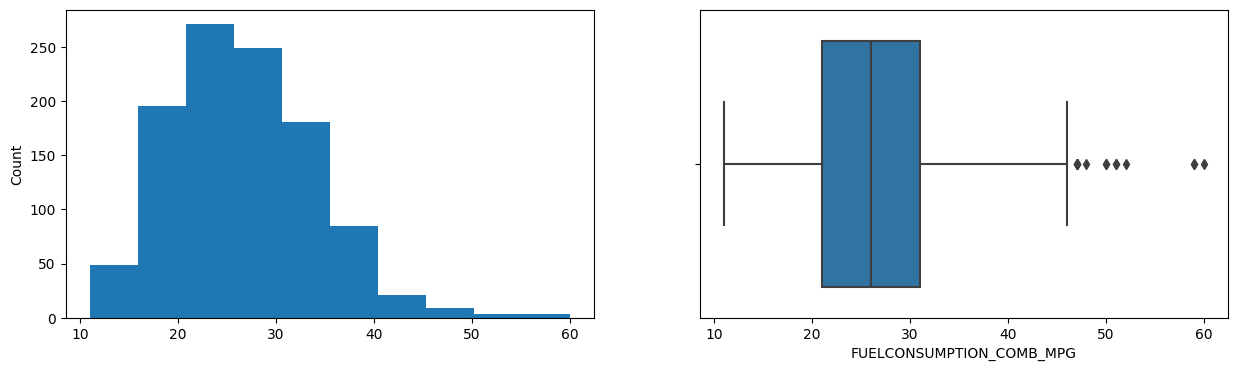

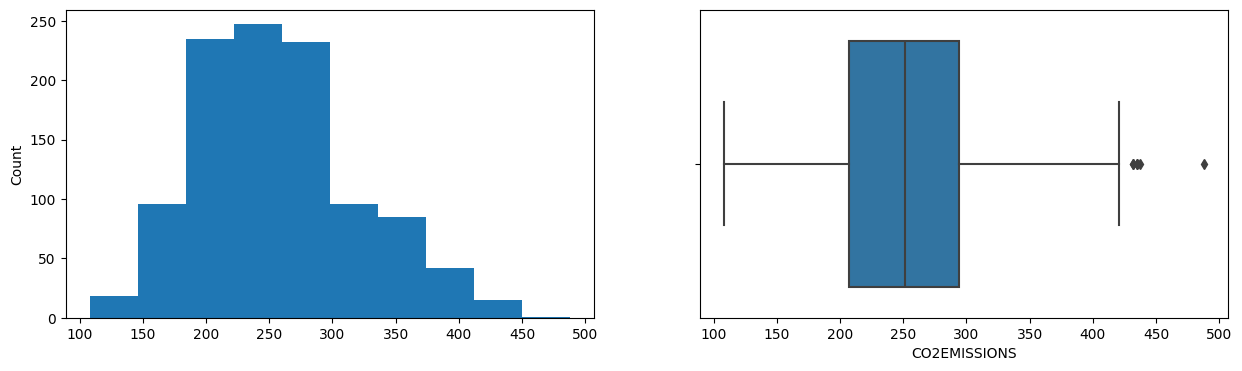

In [19]:
#Plot histograms and box plot together

for col in num_cols:
    print(col)
    print('Skew:', round(df[col].skew(), 2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show
    

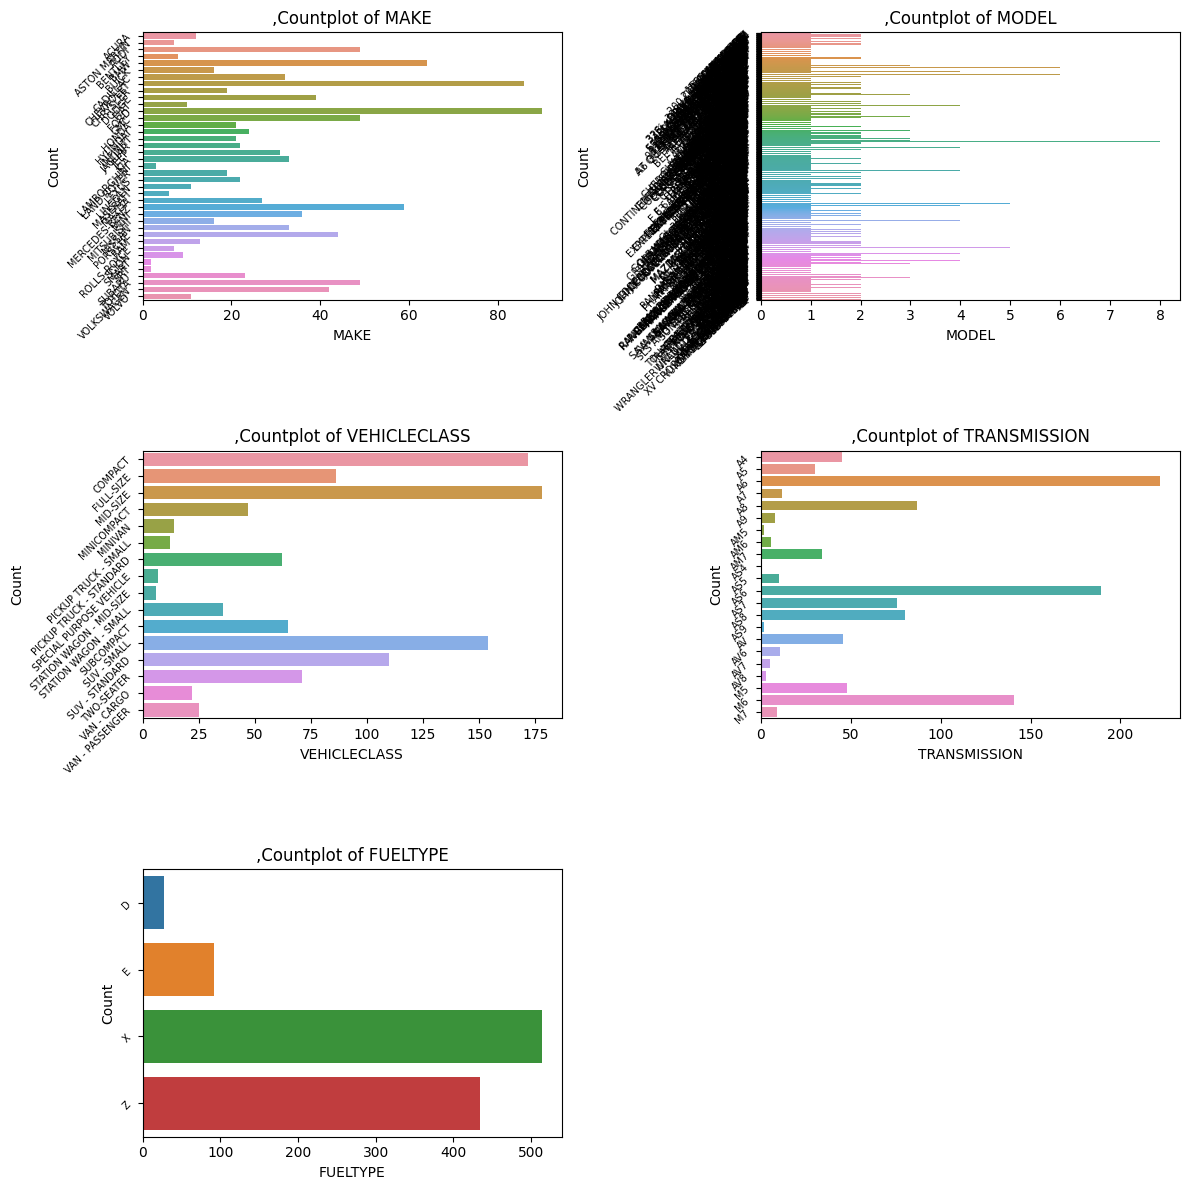

In [20]:
#Selecting only the categorical and object columns
obj_cat_cols = df.select_dtypes(include=['object', 'category']).columns

#Setting up the subplot grid
n_cols = 2 #number os columns in the subplot grid
n_rows = (len(obj_cat_cols) +n_cols -1) // n_cols #ensuring enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows *4)) #adjust the size
axes = axes.flatten() #flatten the 2d array of axes for easy iteration

#plotting each categorical column
for i, column in enumerate(obj_cat_cols):
    sns.countplot(y = df[column], ax=axes[i]) #change the y to x will create horizontal plots
    axes[i].set_title(f',Countplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
for ax in axes:
    ax.tick_params(axis='y', labelsize=7 )#adjust the label size
    
for ax in axes:
    for label in ax.get_yticklabels():
        label.set_rotation(45) #rotate the labels 45 degrees
    
#Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout() #ensure the plots are neatly arranged and labels do not overlap
plt.show()

In [21]:
#####Interactive plot - Just amazing - Enjoy
#!pip install plotly --upgrade
pio.renderers.default = 'notebook' #or jupyterlab if this is the case
from plotly.subplots import make_subplots
import pandas as pd

# Assuming 'df' is your DataFrame

# Select categorical and numerical data
categorical_df = df.select_dtypes(include=['object', 'category'])
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns='CO2EMISSIONS').columns

# Calculate the total number of subplots needed
total_plots = len(categorical_df.columns) + len(numerical_columns)
n_cols = 2  # Number of columns per row in the subplot grid
n_rows = (total_plots + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create the subplot figure
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=list(categorical_df.columns) + list(numerical_columns))

# Add horizontal bar plots for categorical columns to subplots
for i, column in enumerate(categorical_df.columns):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1

    fig.add_trace(
        go.Bar(
            y=categorical_df[column].value_counts().index,
            x=categorical_df[column].value_counts().values,
            orientation='h',
            name=column
        ),
        row=row,
        col=col
    )

# Add scatter plots for numerical columns to subplots
for j, column in enumerate(numerical_columns, start=i+1):
    row = (j // n_cols) + 1
    col = (j % n_cols) + 1

    fig.add_trace(
        go.Scatter(
            x=df[column],
            y=df['CO2EMISSIONS'],
            mode='markers',
            name=column
        ),
        row=row,
        col=col
    )
  
# Update layout if needed
fig.update_layout(height=300*n_rows, showlegend=False, title_text="Categorical Distributions and Numerical vs CO2EMISSIONS")
fig.show()

'''from plotly.offline import plot
plot(fig, filename = 'temp-plot.html', auto_open=True)
fig.show(renderers = 'browser')'''

"from plotly.offline import plot\nplot(fig, filename = 'temp-plot.html', auto_open=True)\nfig.show(renderers = 'browser')"

In [22]:
'''D-Tale is a Python library that provides a GUI interface for 
analyzing and visualizing Pandas data frames. It allows users 
to quickly visualize data, 
perform statistical analysis, and create interactive plots.
Very useful for quick insights'''
#!pip install dtale

#Amazing plots and feasibility. Very easy to work with
d = dtale.show(df)
d.open_browser() #open in a new browser

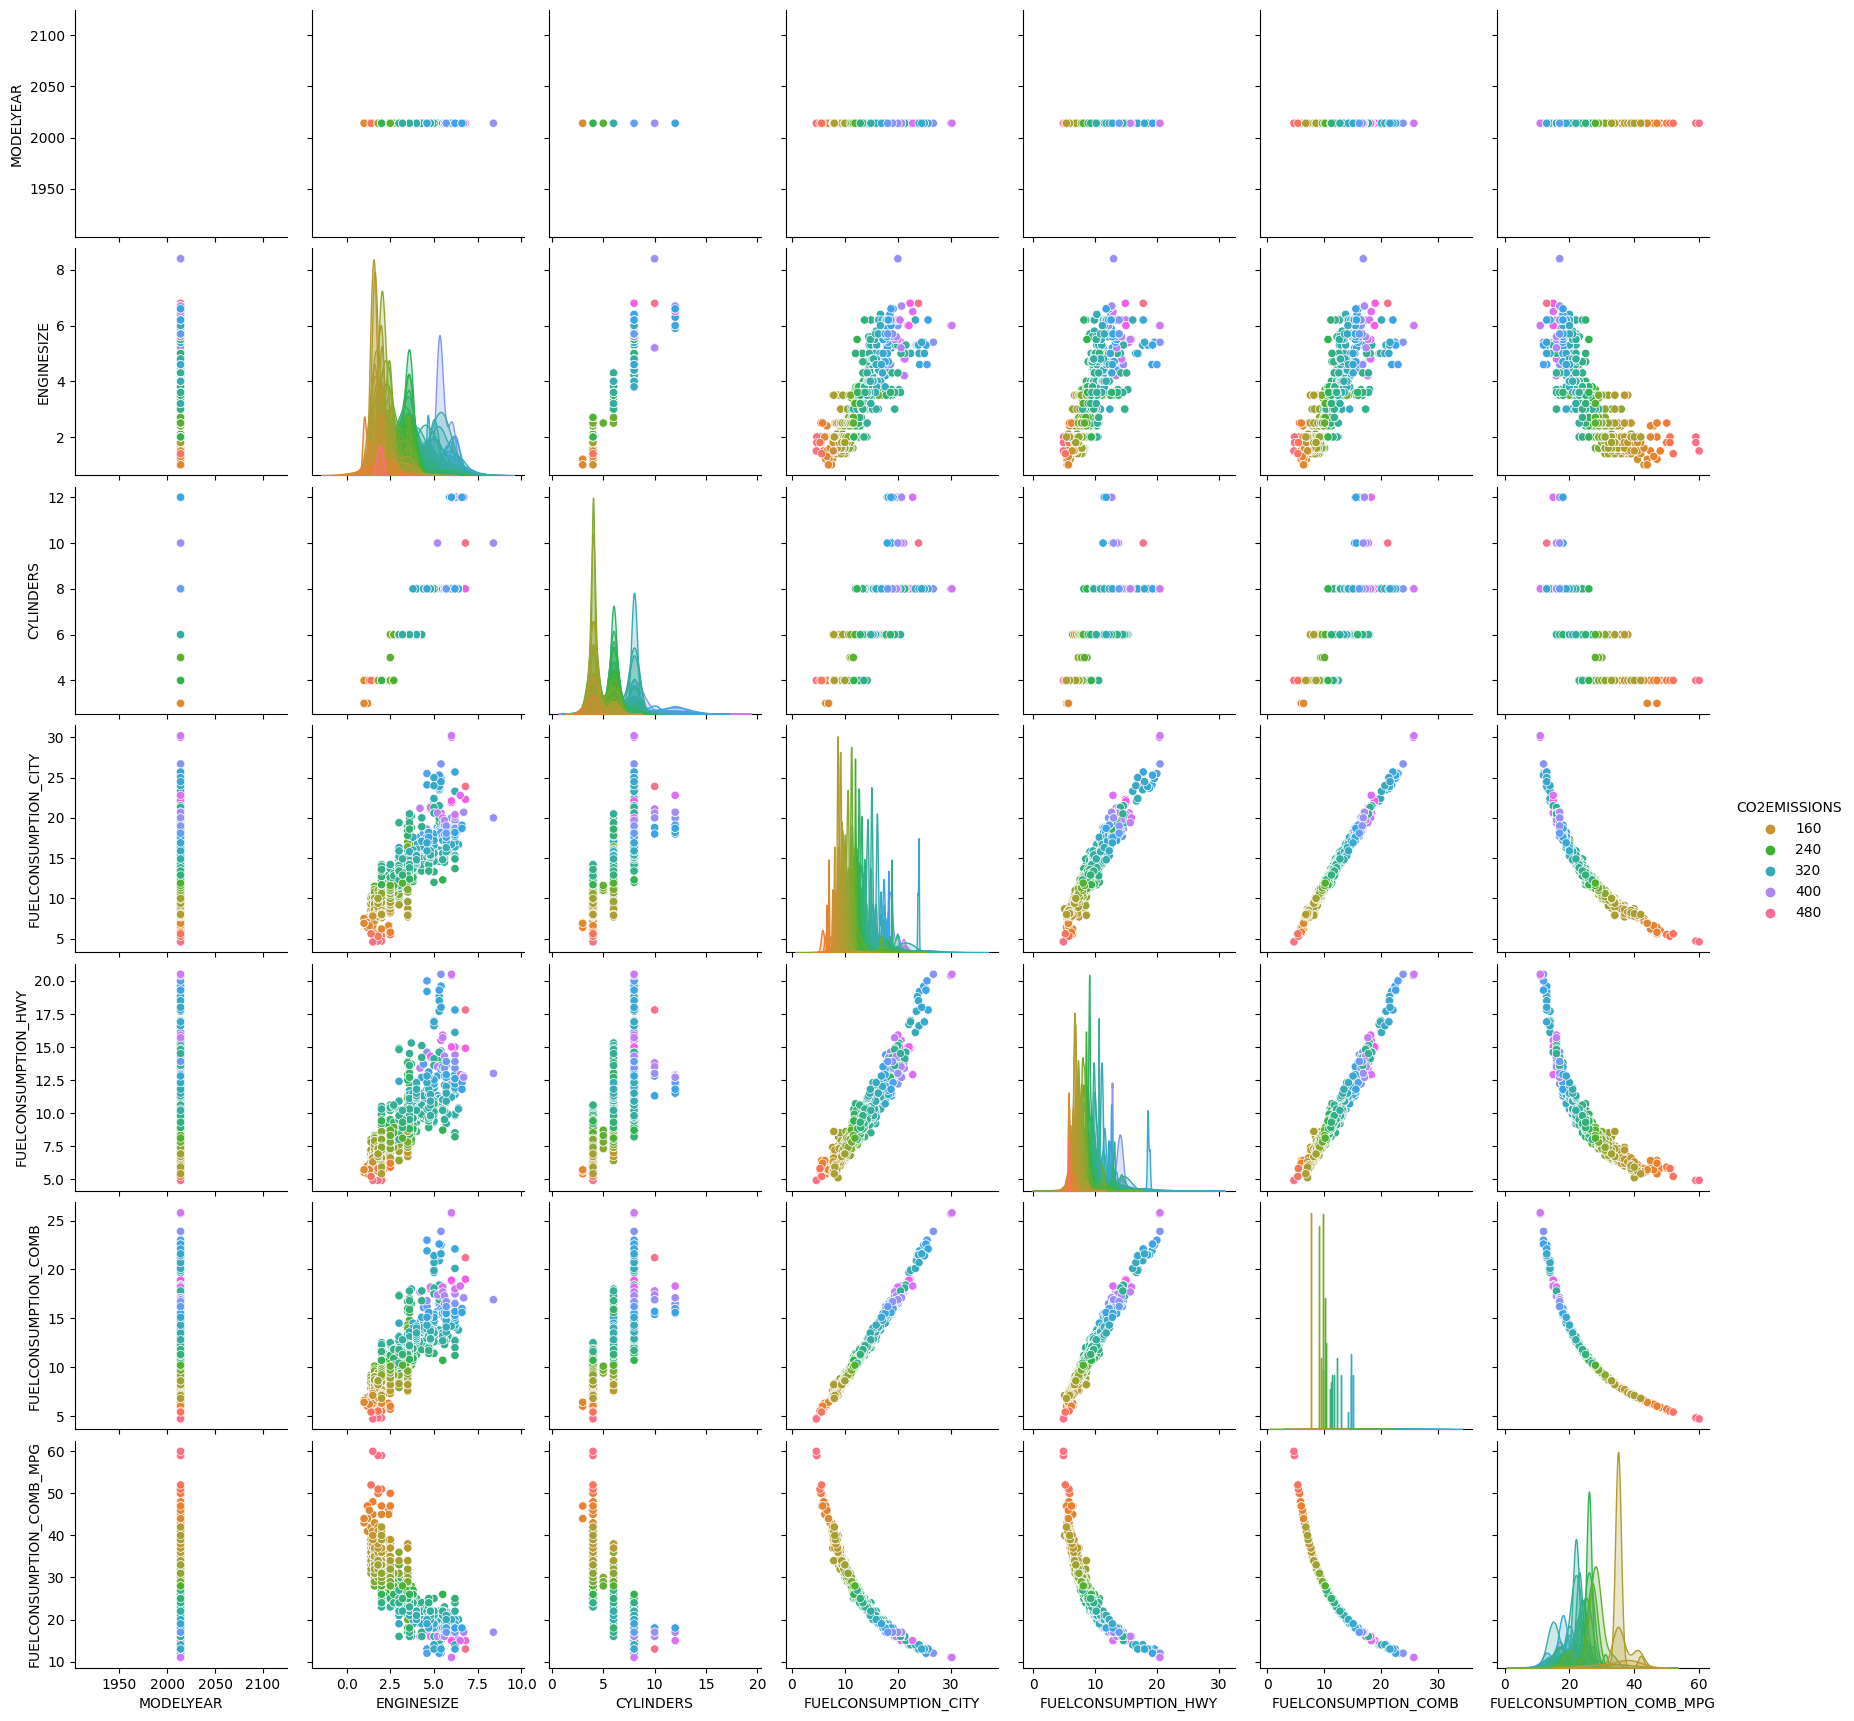

In [23]:
'''From the picture below, we can observe the variations
in each plot. The plots are in matrix format where the 
row name represents x axis and column name represents the y axis. 
The main-diagonal subplots are the univariate histograms (distributions) 
for each attribute.
Pair plot is used to understand the best set of features to explain a
relationship between two variables or to form the most separated clusters. 
It also helps to form some simple classification models by drawing some simple 
lines or make linear separation in our data-set.
where :
kind : Kind of plot for the non-identity relationships. {‘scatter’, ‘reg’}
diag_kind : Kind of plot for the diagonal subplots. {‘hist’, ‘kde’}'''
#sns.pairplot(df, hue='CO2EMISSIONS', palette='husl')
sns.pairplot(df, hue='CO2EMISSIONS', diag_kind = 'kde',
             kind = 'scatter', palette='husl')

Exaple for filling missing values
data.Seats.isnull().sum()
data['Seats'].fillna(value=np.nan,inplace=True)
data['Seats']=data.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
data['Engine']=data.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))
data['Power']=data.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))
In general, there are no defined or perfect rules for imputing missing values in a dataset. Each method can perform better for some datasets but may perform even worse. Only practice and experiments give the knowledge which works better.

!pip install dataprep


from dataprep.eda import create_report
create_report(df)

!pip install pandas-profiling[notebook]

from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Report")
profile

In [24]:
"""----To update in the near future---"""

'''AutoViz provides similar functionality. You can generate much 
more detailed plots for your dataset with AutoViz using only 
one line of code. 

#Very good for a general report 
#pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
#df_av = AV.AutoViz("FuelConsumptionCo2.csv")

#df = "FuelConsumptionCo2.csv"
target_variable = "CO2EMISSIONS"
dft = AV.AutoViz(df, sep=",", depVar="CO2EMISSIONS", dfte=None, header=0, verbose=1,
                 lowess=False, chart_format="svg", max_rows_analyzed=150000,
                 max_cols_analyzed=30, save_plot_dir=None)'''

'AutoViz provides similar functionality. You can generate much \nmore detailed plots for your dataset with AutoViz using only \none line of code. \n\n#Very good for a general report \n#pip install autoviz\n\nfrom autoviz.AutoViz_Class import AutoViz_Class\nAV = AutoViz_Class()\n#df_av = AV.AutoViz("FuelConsumptionCo2.csv")\n\n#df = "FuelConsumptionCo2.csv"\ntarget_variable = "CO2EMISSIONS"\ndft = AV.AutoViz(df, sep=",", depVar="CO2EMISSIONS", dfte=None, header=0, verbose=1,\n                 lowess=False, chart_format="svg", max_rows_analyzed=150000,\n                 max_cols_analyzed=30, save_plot_dir=None)'

In [25]:
'''#Full autoviz properties

from autoviz import AutoViz_Class
from autoviz import FixDQ
AV = AutoViz_Class()

filename = "FuelConsumptionCo2.csv"
target_variable = "CO2EMISSIONS"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)'''

'#Full autoviz properties\n\nfrom autoviz import AutoViz_Class\nfrom autoviz import FixDQ\nAV = AutoViz_Class()\n\nfilename = "FuelConsumptionCo2.csv"\ntarget_variable = "CO2EMISSIONS"\n\ndft = AV.AutoViz(\n    filename,\n    sep=",",\n    depVar=target_variable,\n    dfte=None,\n    header=0,\n    verbose=1,\n    lowess=False,\n    chart_format="svg",\n    max_rows_analyzed=150000,\n    max_cols_analyzed=30,\n    save_plot_dir=None\n)'

In [26]:
'''#importing Autoviz class
#evaluate the dataset
from autoviz.AutoViz_Class import AutoViz_Class #Instantiate the AutoViz class
AV = AutoViz_Class()

df = AV.AutoViz('FuelConsumptionCo2.csv')'''

"#importing Autoviz class\n#evaluate the dataset\nfrom autoviz.AutoViz_Class import AutoViz_Class #Instantiate the AutoViz class\nAV = AutoViz_Class()\n\ndf = AV.AutoViz('FuelConsumptionCo2.csv')"

In [27]:
'''#Using the dataset and the dependent variable

df = AV.AutoViz('FuelConsumptionCo2.csv', depVar='CO2EMISSIONS')'''


"#Using the dataset and the dependent variable\n\ndf = AV.AutoViz('FuelConsumptionCo2.csv', depVar='CO2EMISSIONS')"

In [28]:
"""---Just amazing!---"""

'''In-depth EDA (target analysis, comparison, feature analysis, correlation) 
in two lines of code!
SweetViz also provides an interactive EDA with just two lines of code. In addition, 
you can compare two datasets easily, like training and test dataset for 
your machine learning projects.
To get a report from SweetViz, you can run the following command on any 
data frame, and it will generate an HTML report.'''

'''The summary shows us the characteristics of both dataframes side-by-side. 
We can immediately identify that the testing set is roughly half
the size of the training set, but that it contains the same features. That legend at the bottom shows us that the training set does contain the “Survived” target variable, but that the testing set does not.

Note that Sweetviz will do a best guess at determining the data type 
of each column, between numerical, category/boolean and text. These can 
be overridden, more on that below.

Associations
Hovering your mouse over the “Associations” button in the summary will 
make the Associations graph appear on the right-hand side:

Detail area (categorical/boolean)
When you move the mouse to hover over any of the variables,
an area to the right will showcase the details. The content of 
the details depends on the type of variable being analyzed. In the 
case of a categorical (or boolean) variable, as is the case with the target, 
the analysis is as follows:'''

"""Important: THE OUTPUT WILL OPEN IN A NEW BROWSER!"""

#--------just wonderful--------
#!pip install sweetviz
import sweetviz as sv

report = sv.analyze(df)

#report.show_html('Sweetviz_Report.html')
#report.show_notebook( w='100%', h='full') #show the report in notebook
report.show_html(layout = 'widescreen', scale = 1.0) #show the report in a new browser

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


We can plot each of these features:


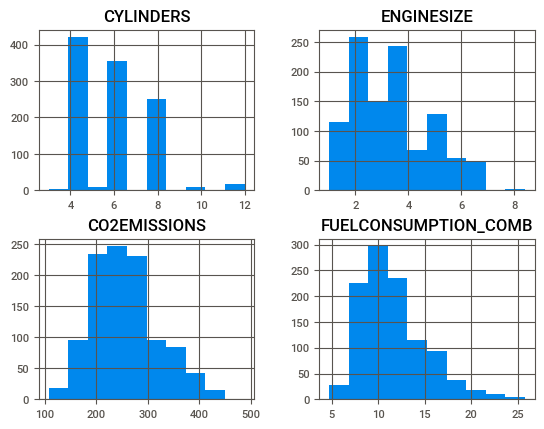

In [29]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


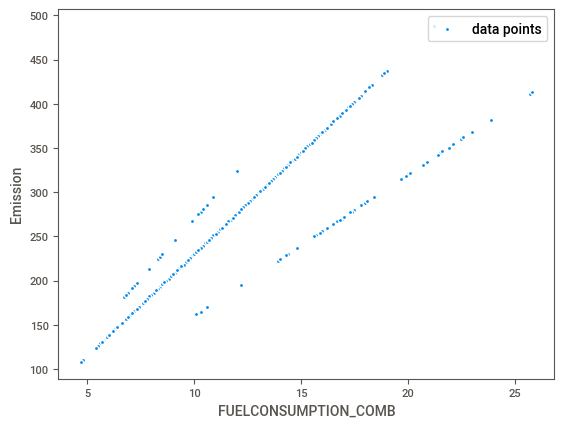

In [30]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  label= 'data points', edgecolor='w')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.legend()
plt.legend(loc = 'upper right', )

plt.show()

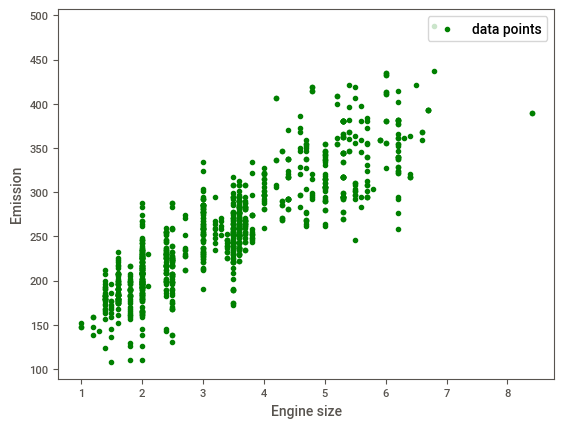

In [31]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, label = 'data points',  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.legend(loc = 'upper right', )
plt.show()

## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


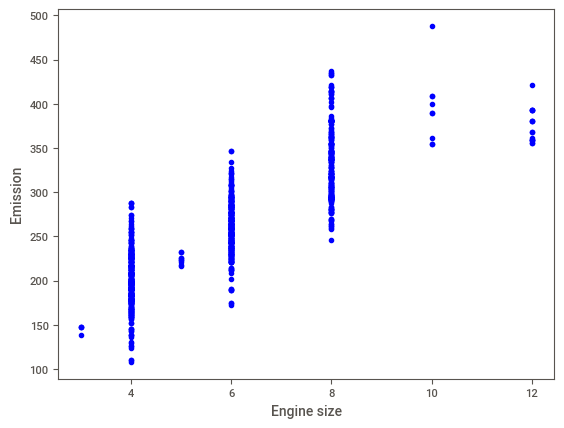

In [32]:
# Plot
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

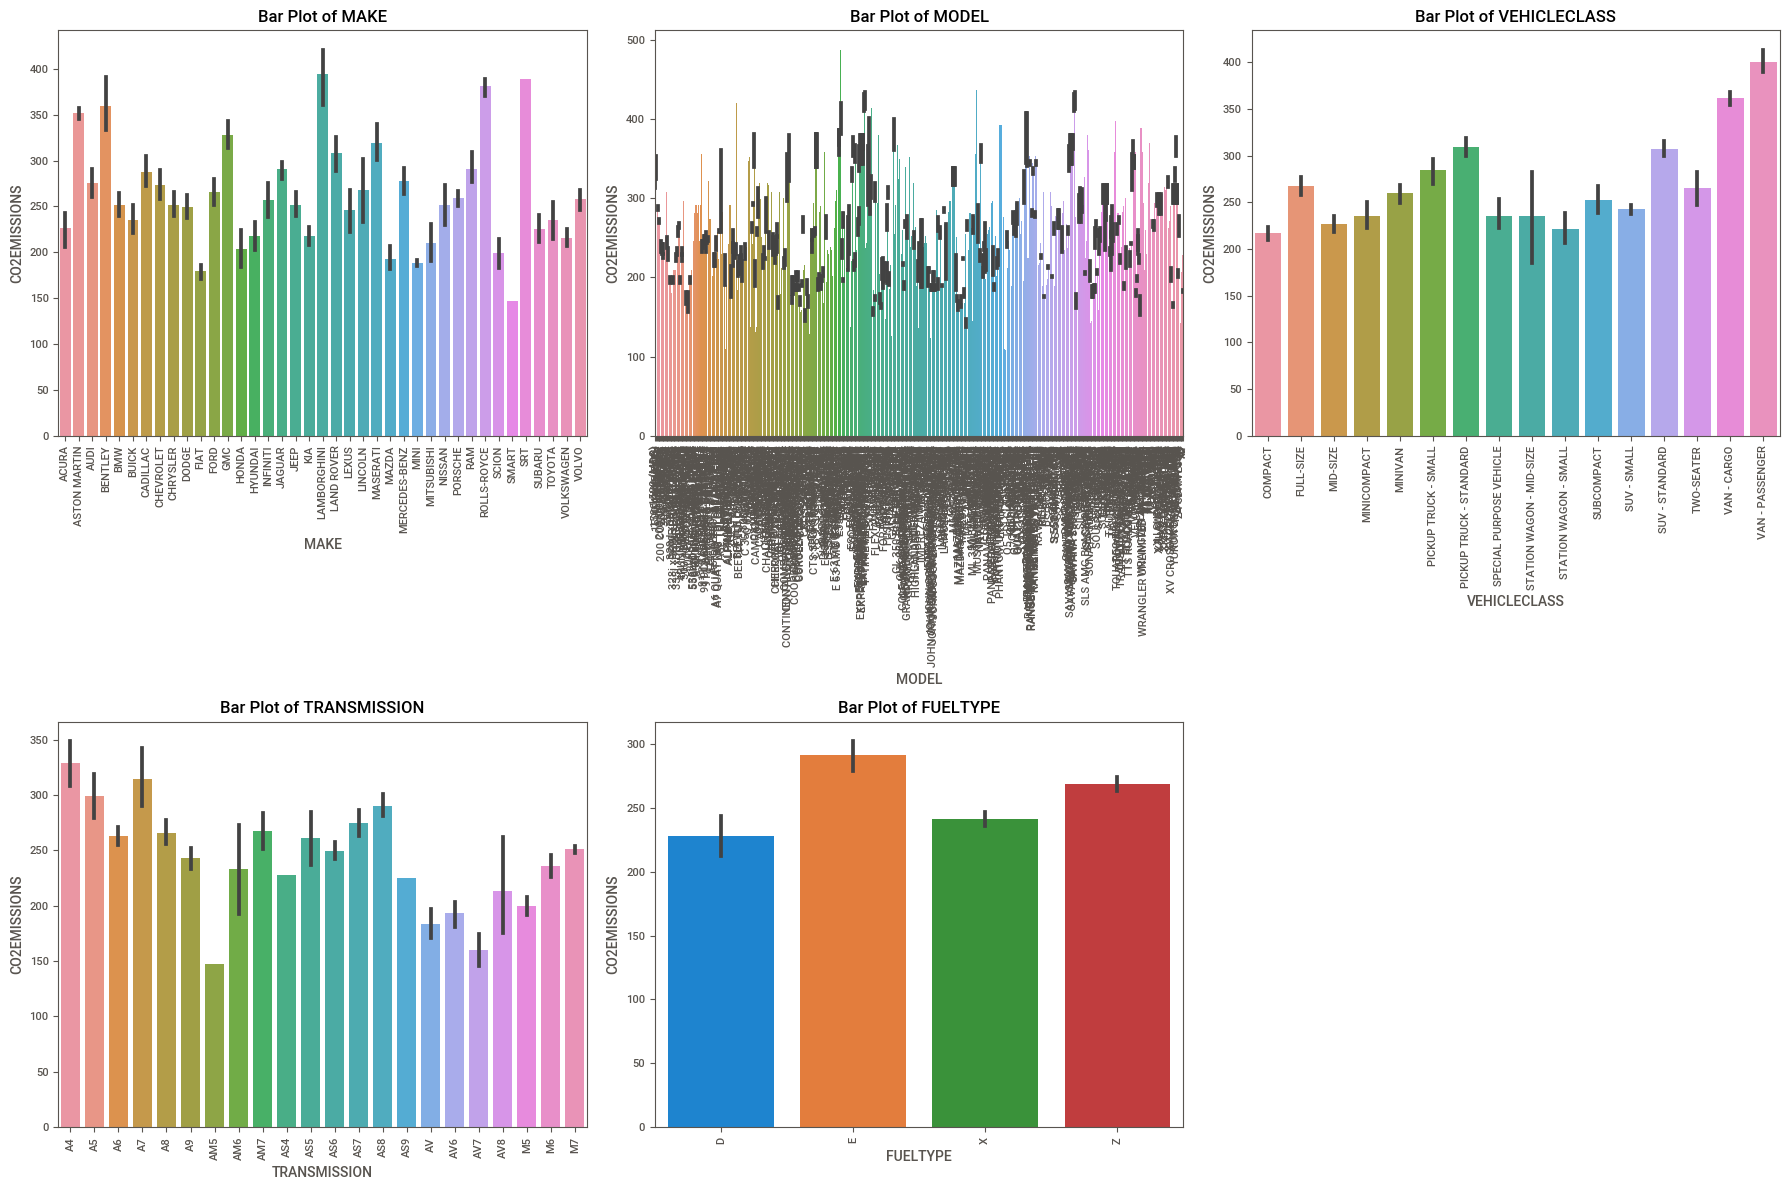

"sns.barplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = df)\nsns.barplot(x = 'MAKE', y = 'CO2EMISSIONS', data = df)\nsns.barplot(x = 'MODEL', y = 'CO2EMISSIONS', data = df)\nsns.barplot(x = 'VEHICLECLASS', y = 'CO2EMISSIONS', data = df)\nsns.barplot(x = 'TRANSMISSION', y = 'CO2EMISSIONS', data = df)\nsns.barplot(x = 'FUELTYPE', y = 'CO2EMISSIONS', data = df)\n#Categorical Variables: Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')\nplt.show"

In [33]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

category_column = ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']

for ax, category in zip(axes.flatten(), category_column):
    sns.barplot(x = category, y = 'CO2EMISSIONS', data = df, ax=ax)
    ax.set_title(f'Bar Plot of {category}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
#remove or hide the last subplot
axes[-1, -1].set_visible(False)

plt.tight_layout()
plt.show()
                 
'''sns.barplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', data = df)
sns.barplot(x = 'MAKE', y = 'CO2EMISSIONS', data = df)
sns.barplot(x = 'MODEL', y = 'CO2EMISSIONS', data = df)
sns.barplot(x = 'VEHICLECLASS', y = 'CO2EMISSIONS', data = df)
sns.barplot(x = 'TRANSMISSION', y = 'CO2EMISSIONS', data = df)
sns.barplot(x = 'FUELTYPE', y = 'CO2EMISSIONS', data = df)
#Categorical Variables: Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')
plt.show'''

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [34]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


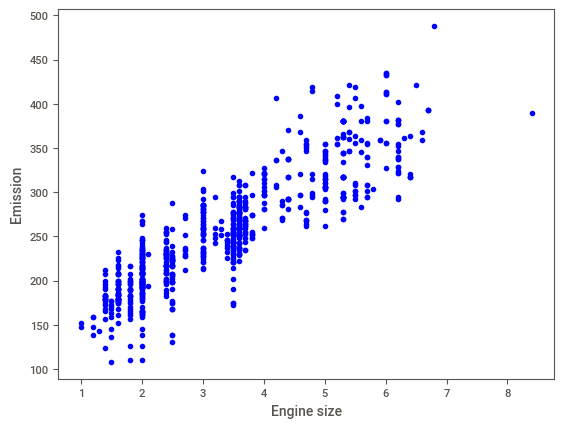

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.


In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.97177931]]
Intercept:  [122.1896754]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

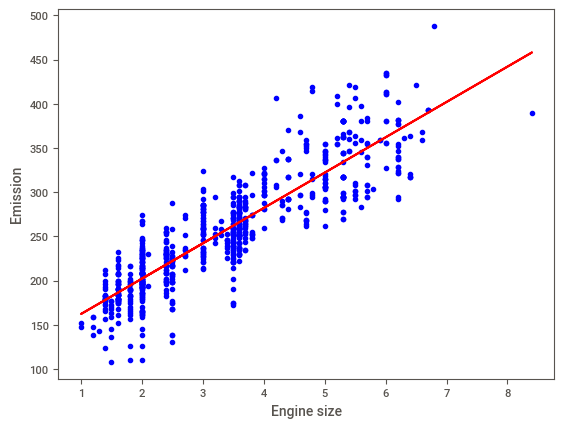

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Relative Absolute Error (RAE), Relative Squared 
Error (RSE), and the coefficient of determination (R2) are all metrics used to measure the performance of regression models. 
Each metric has its own use cases and interpretations:

Mean Absolute Error (MAE):
When to Use: When you want a metric that's robust to outliers and you care about the magnitude of errors on the same scale as the data.
Why: It's easy to interpret because it directly represents the average error in the units of the target variable.

Mean Squared Error (MSE):
When to Use: When you want to penalize larger errors more severely (squared error grows quadratically with the actual error) and outliers 
in the data are of concern as they will contribute more to the total error.
Why: It's useful when you have a concern about large errors whose consequences are much larger than equivalent smaller ones 
(e.g., forecasting energy load).

Root Mean Squared Error (RMSE):
When to Use: Similar to MSE, but when you want the error metric to be in the same units as the target variable.
Why: RMSE is more sensitive to outliers than MAE and gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.

Relative Absolute Error (RAE) / Mean Absolute Percentage Error (MAPE):
When to Use: When you want to express the prediction accuracy as a percentage, which normalizes the absolute error by the magnitude of the actual measured values.
Why: It is useful when you need to compare the performance of the model between different datasets with different scales.

Relative Squared Error (RSE):
When to Use: When you want to normalize the total squared error by the total squared error of the simple predictor (mean of actual values).
Why: It's a way to reduce the scale of the error to a relative measurement, which can be useful for comparison across different datasets.

Coefficient of Determination (R2):
When to Use: When you want to measure how well future samples are likely to be predicted by your model. R2
describes the proportion of variance in the dependent variable that is predictable from the independent variables.
Why: It's a very common measure for evaluating the goodness of fit of a model. An R2
of 1 indicates that the regression predictions perfectly fit the data, whereas an R2
of 0 indicates that the model does not fit the data at all.

In Summary:
Use MAE when you need a straightforward measure of average error that is not overly sensitive to outliers.
Use MSE or RMSE when large errors are particularly undesirable and should be penalized more heavily.
Use RAE or MAPE when you want to normalize errors to the scale of the data and express them in percentage terms.
Use RSE when you want to compare model performance between different datasets or scales.
Use R2 when you want a measure that can describe the proportion of variance explained by the model in the dependent variable.
Each of these metrics has its place, and often, more than one will be used to fully understand a model's performance. It is also important to 
combine these quantitative metrics with domain-specific knowledge to determine the most appropriate ones for a given task.

In [38]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 26.03
Residual sum of squares (MSE): 1197.25
R2-score: 0.69


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [39]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [40]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

Find the predictions using the model's `predict` function and the `test_x` data


In [41]:
predictions = regr.predict(test_x)

Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [42]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))


Mean Absolute Error: 19.67


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`

# Summary will full intepretation of Machine Learning results, graphs and Metrics

Mean Absolute Error (MAE): 24.097257411707837
Mean Squared Error (MSE): 985.9381692274995
Root Mean Squared Error (RMSE): 31.399652374309806
Relative Absolute Error (RAE): 0.46068345401613536
Relative Squared Error (RSE): 0.23844042680656266
Coefficient of Determination (R^2): 0.7615595731934374


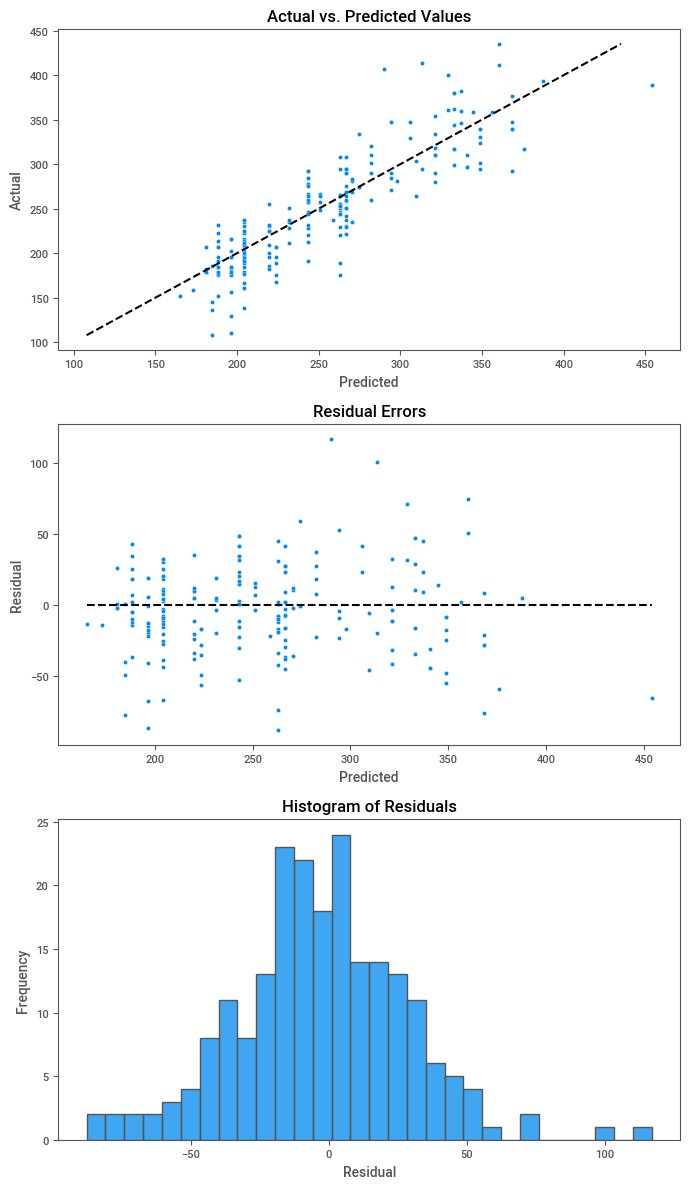

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('FuelConsumptionCo2.csv')

# Select a subset of the dataframe to use for the model
cdf = df[['ENGINESIZE','CO2EMISSIONS']]

# Split the data into training and testing sets
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

# Prepare training and testing data
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
predictions = regr.predict(test_x)

# Create a DataFrame with actual and predicted values and calculate residuals
df1 = pd.DataFrame({
    'Actual': test_y.flatten(),
    'Predicted': predictions.flatten()
})
df1['Residual'] = df1['Actual'] - df1['Predicted']

# Calculate performance metrics
mae = mean_absolute_error(df1['Actual'], df1['Predicted'])
mse = mean_squared_error(df1['Actual'], df1['Predicted'])
rmse = np.sqrt(mse)
r2 = r2_score(df1['Actual'], df1['Predicted'])
mean_actual = np.mean(df1['Actual'])
rae = np.sum(np.abs(df1['Actual'] - df1['Predicted'])) / np.sum(np.abs(df1['Actual'] - mean_actual))
rse = np.sum((df1['Actual'] - df1['Predicted'])**2) / np.sum((df1['Actual'] - mean_actual)**2)

# Create the plots
fig, axs = plt.subplots(3, 1, figsize=(7, 12), sharex=False)

# Scatter plot for actual vs. predicted values
sns.scatterplot(x='Predicted', y='Actual', data=df1, ax=axs[0])
axs[0].plot([df1['Actual'].min(), df1['Actual'].max()], [df1['Actual'].min(), 
                                                         df1['Actual'].max()], 'k--')
axs[0].set_title('Actual vs. Predicted Values')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# Residual errors plot
sns.scatterplot(x='Predicted', y='Residual', data=df1, ax=axs[1])
axs[1].hlines(y=0, xmin=df1['Predicted'].min(), xmax=df1['Predicted'].max(), 
              colors='k', linestyles='--')
axs[1].set_title('Residual Errors')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Residual')

# Histogram plot for residuals
sns.histplot(df1['Residual'], bins=30, kde=False, ax=axs[2])
axs[2].set_title('Histogram of Residuals')
axs[2].set_xlabel('Residual')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
#plt.show()

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Relative Absolute Error (RAE): {rae}")
print(f"Relative Squared Error (RSE): {rse}")
print(f"Coefficient of Determination (R^2): {r2}")


###INTERPRETATION of the plots
The results from the plots provide insight into the performance of the linear 
regression model in predicting CO2 emissions based on engine size. 
Here's an interpretation of each plot:

Actual vs. Predicted Values Scatter Plot:
This plot shows the relationship between the actual CO2 emissions 
(test data) and the predicted CO2 emissions from the model.
The points represent individual observations.
The dashed line represents the line of perfect prediction. If a point 
lies on this line, it means the prediction was exactly correct.
The closer the points are to this line, the better the model's predictions are. 
If the points are widely scattered around the line, it indicates larger errors 
in prediction.

Residual Errors Scatter Plot:
This plot shows the residuals, which are the differences between the actual 
and predicted values, for each prediction.
The horizontal dashed line at zero represents no error.
Points above the line indicate overestimation by the model, while points 
below the line indicate underestimation.
If the residuals are randomly dispersed around the horizontal line, 
it suggests that the model's predictions are unbiased. If there's a 
pattern (like a clear curve), this might indicate model bias or that 
a linear model isn't the best fit for the data.

Histogram of Residuals:
This histogram shows the distribution of the residual errors.
The x-axis represents the residual value, while the y-axis represents 
the frequency of those residuals.
distribution centered around zero, indicating that most predictions are 
close to correct, with fewer large errors.
If the histogram is skewed or has multiple peaks, the model might be 
systematically over or under-predicting, or there could be subsets of 
data where the model performs differently.
By looking at these plots, you can assess not just the average 
performance of the model, but also the distribution and nature of 
any errors it makes. It's important to use these insights to consider 
whether a linear regression is the best model choice, or if the model 
could be improved by considering additional features, applying transformations, 
or using a different type of model altogether.

###INTERPRETATION of the perfomance metrics:

The exact interpretation would depend on the plots themselves, 
The interpretation of the calculated metrics from the linear regression model predicting CO2 emissions based on engine size is as follows:

Mean Absolute Error (MAE) of 23.08: This value indicates that, on average, the model's predictions are about 23.08 units away from the actual CO2 emission values. This is a measure of the average magnitude of the errors without considering their direction (positive or negative).

Mean Squared Error (MSE) of 954.29: The MSE is quite larger than the MAE because it squares the errors before averaging them, which gives more weight to larger errors. This suggests there may be some predictions that are significantly off from the actual values.

Root Mean Squared Error (RMSE) of 30.89: This is the square root of the MSE and is expressed in the same units as the CO2 emissions themselves. The RMSE is a measure of the standard deviation of the prediction errors. An RMSE of 30.89 indicates that the majority of the model's prediction errors fall within ±30.89 units of the actual values. The RMSE gives you an idea of the magnitude of the errors and how spread out these errors are around the line of best fit.

Relative Absolute Error (RAE) of 0.42: The RAE compares the total absolute error of the model to the total absolute error of a naive model that simply predicts the mean value of the dependent variable for all observations. An RAE of 0.42 indicates that the model's errors are 42% of the errors you would have if you made no attempt to predict the CO2 emissions and just guessed the mean every time. This suggests that the model has reduced the prediction error compared to a naive model.

Relative Squared Error (RSE) of 0.21: Like RAE, the RSE compares the model's performance to a naive model, but it does so by looking at the squared errors. An RSE of 0.21 suggests that the model's squared errors are 21% of what they would be with the naive approach. A lower RSE means better performance.

Coefficient of Determination (R^2) of 0.785: This value indicates that approximately 78.5% of the variability in the CO2 emissions can be explained by the engine size using this model. The remaining 21.5% of the variability is due to other factors not included in the model or inherent variability. An R^2
closer to 1 indicates that the model explains a larger portion of the variance in the dependent variable.

The R^2 value is reasonably high, which implies that the model fits the data well. However, the RMSE suggests there are still some significant errors in the predictions. These errors could potentially be reduced by incorporating more variables into the model, applying feature engineering, or using more complex modeling techniques. The plots would provide visual insights into the distribution of errors and could help identify any patterns or biases in the model's predictions.